In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
import gc
gc.collect()

0

In [3]:
BES_numerics_only = pd.read_hdf("..\BES_analysis_data\W8Panel_numerics_only.hdf")
BES_numerics_only_uncut = BES_numerics_only

In [4]:
# partyContactPC_4W1                  NaN
# partyContactPC_6W4                  NaN
# partyContactOther_1W4               NaN
# partyContactOther_1W5               NaN
# euRefVoteSqueezeW8                  NaN

In [5]:
counts = BES_numerics_only.count()
counts_responders = BES_numerics_only.count(axis=1)

In [6]:
euRefVotePos = ~BES_numerics_only["euRefVoteW8"].isnull()

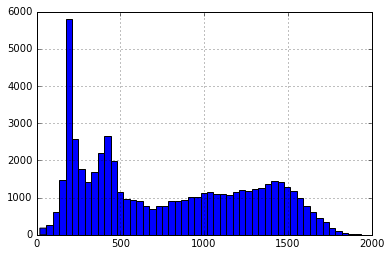

In [7]:
counts_responders.hist(bins=50)

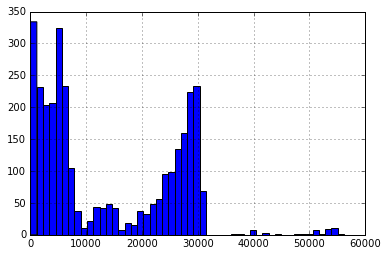

In [8]:
counts.hist(bins=50)

In [9]:
BES_numerics_only = BES_numerics_only[BES_numerics_only.columns[ counts>counts.quantile(.5)] ].drop("id",axis=1)


In [10]:
BES_numerics_only = BES_numerics_only[euRefVotePos]

In [11]:
clean_feature_set_nonan = BES_numerics_only.fillna(BES_numerics_only.mean())

In [12]:
from sklearn.preprocessing import StandardScaler
clean_feature_set_std = StandardScaler().fit_transform(clean_feature_set_nonan)
clean_feature_set_std = pd.DataFrame(clean_feature_set_std,
                                     columns = BES_numerics_only.columns,
                                     index   = BES_numerics_only.index)

In [13]:
X_std = clean_feature_set_std

explained variance ratio (first two components): [ 0.14444142  0.04517915  0.03276187  0.0182776   0.0179606   0.01467924
  0.01258691  0.01155824  0.01083355  0.00950759]


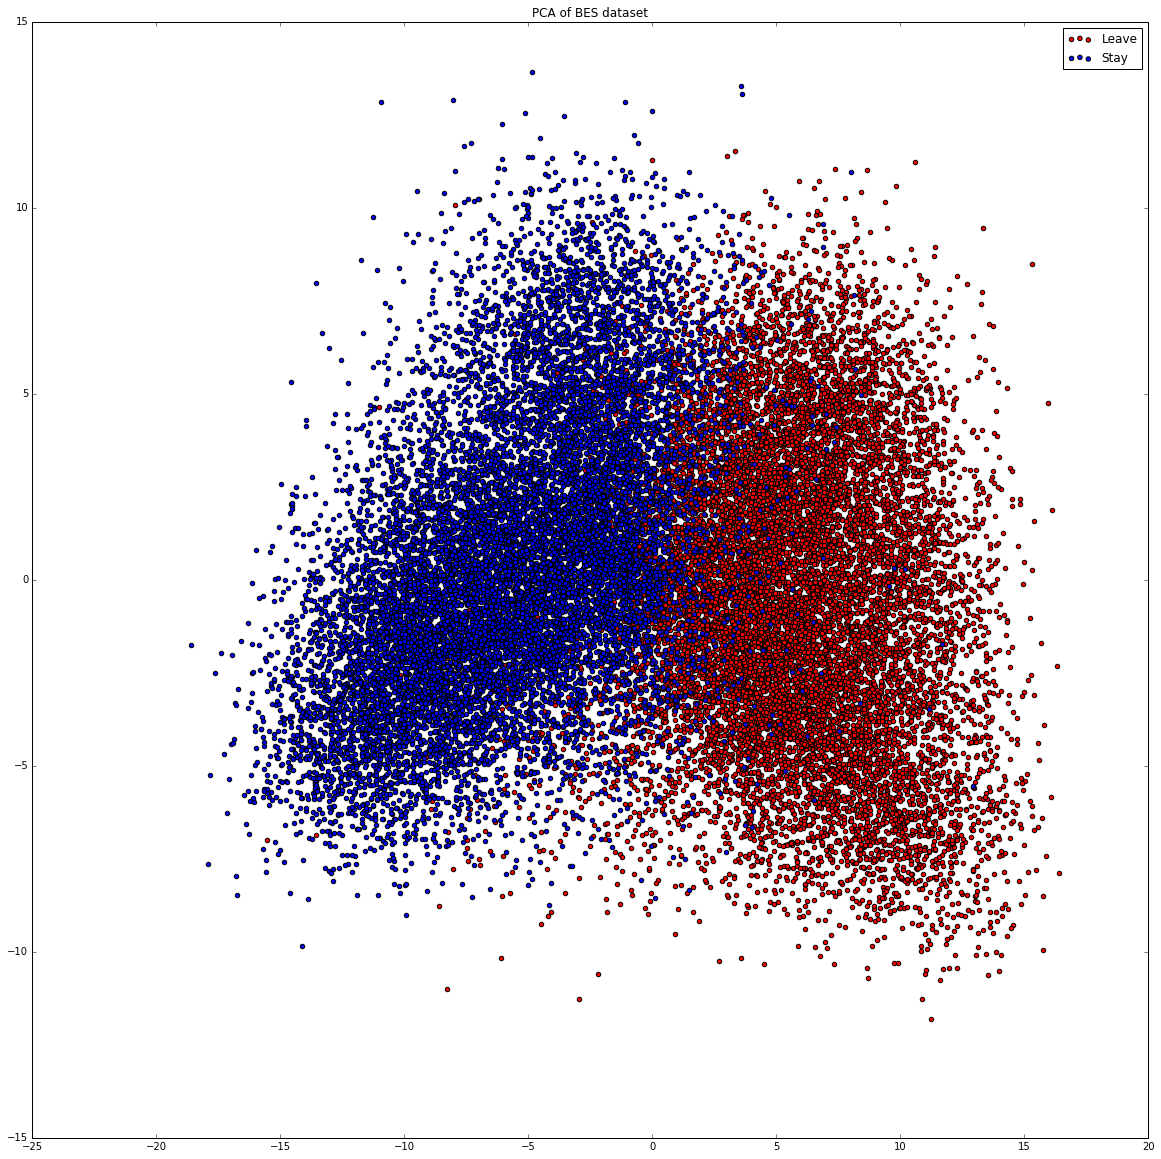

In [84]:
X = X_std
Leave = (X_std["euRefVote"]>0).values
Stay = (X_std["euRefVote"]<0).values

#target_names = ["Stay","Leave"]

pca = PCA(n_components=10)
X_r = pca.fit(X).transform(X)



# y = X["euRefVoteW8"]==1
# X = X.drop("euRefVoteW8",axis=1)
# lda = LinearDiscriminantAnalysis(n_components=2)
# X_r2 = lda.fit(X, y).transform(X)
# print( (X_r.shape, X_r2.shape ) )
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure(figsize=(20,20))

plt.scatter(X_r[:,0][Leave], X_r[:,1][Leave], c='r', label="Leave")
plt.scatter(X_r[:,0][Stay] , X_r[:,1][Stay] , c='b', label="Stay")

plt.legend()
plt.title('PCA of BES dataset')

# plt.figure()
# for c, i, target_name in zip("rg", [False, True], target_names):
#     plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], c=c, label=target_name)
# plt.legend()
# plt.title('LDA of IRIS dataset')

plt.show()

Index(['euLawsLevel', 'euUKRich', 'immigSelf', 'approveEUW9', 'immigCultural',
       'immigSelfW9', 'immigEcon', 'echr', 'euCloser', 'euPreventWar',
       ...
       'euRefVote2', 'euParlOverRide', 'likeUKIP', 'UKsovereignty',
       'euRefVoteW9', 'EUIntegrationSelfW9', 'EUIntegrationSelf', 'euRefVote',
       'happyEULeaveW9', 'euUndermineIdentity'],
      dtype='object', length=126)

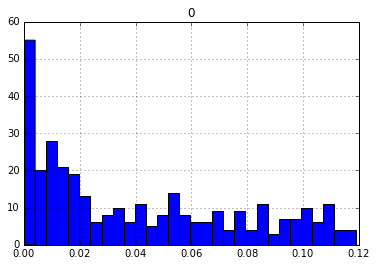

In [85]:
comp_0 = pd.DataFrame(pca.components_[0])
comp_0.abs().hist(bins=30)
comp_0_vars = comp_0[comp_0[0].abs()>.05].sort_values(by=0).index
X_std.columns[comp_0_vars]

Index(['lr4', 'lr3', 'bestPM', 'lr2', 'lr1', 'efficacyPolCare', 'lr5',
       'efficacyPolCareW9', 'generalElectionVote', 'recallVote15',
       'generalElectionVoteW9', 'profile_past_vote_2015', 'partyId',
       'partyIdW9', 'changeCostLive', 'likeCorbyn', 'regSatisfaction',
       'bestOnMII', 'likeCorbynW9', 'bestOnMIIW9', 'changeCrime',
       'profile_past_vote_2010', 'riskPovertyW9', 'ptvLabW9', 'likeLab',
       'ptvGrnW9', 'antiIntellectualW9', 'efficacyNoMatterW9',
       'profile_past_vote_2005', 'likeLabW9', 'likeGrn', 'locus1',
       'campaigninfoRemain', 'ptvLDW9', 'profile_gross_personal', 'satDemEU',
       'EUIntegrationCon', 'likeAlanJohnson', 'likeBorisW9', 'disability',
       'likeFarron', 'likeFarronW9', 'partyIdEUretroW9', 'partyIdEU',
       'profile_gross_household', 'britishnessW9', 'britishness',
       'changeEconomyW9', 'likeLDW9', 'likeLD', 'likeGoveW9', 'likeBoris',
       'likeGove', 'conUnited', 'achieveReduceImmigConW9', 'satDemEngW9',
       'monarch

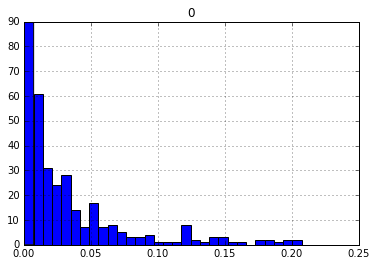

In [86]:
comp_1 = pd.DataFrame(pca.components_[1])
comp_1.abs().hist(bins=30)
comp_1_vars = comp_1[comp_1[0].abs()>.05].sort_values(by=0).index
X_std.columns[comp_1_vars]

In [87]:
X_std = pd.read_hdf("../BES_analysis_data/clean_feature_set_std.hdf")

C:\ANACON~1\envs\BES_analysis\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


((29065, 10), (29065, 0))
explained variance ratio (first two components): [ 0.14444142  0.04517915  0.03276187  0.0182776   0.0179606   0.01467924
  0.01258691  0.01155824  0.01083355  0.00950759]


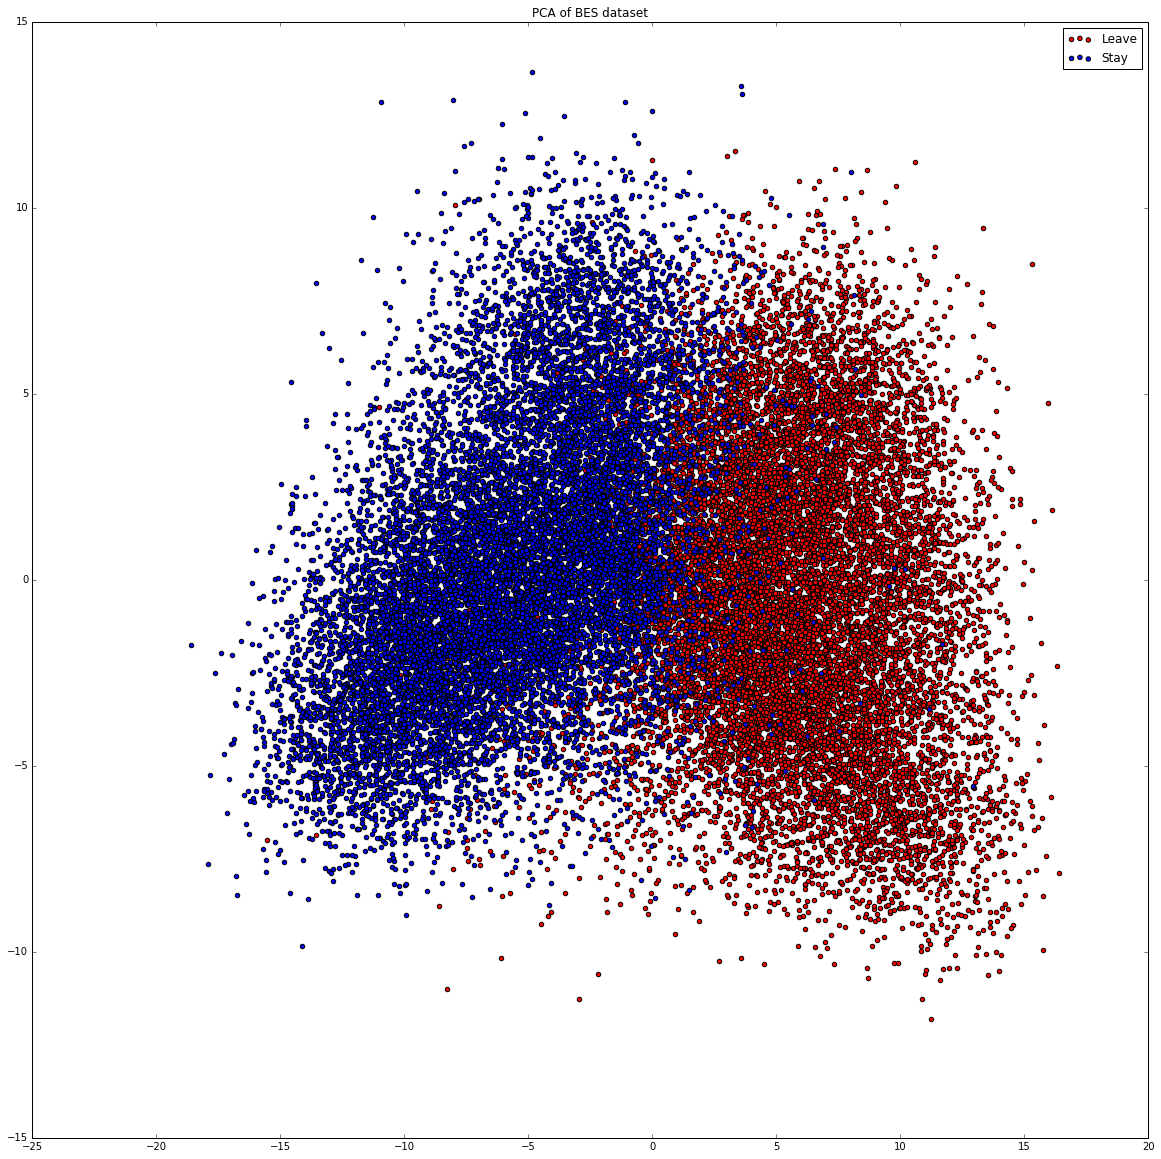

In [88]:


X = X_std
Leave = (X_std["euRefVote"]>0).values
Stay = (X_std["euRefVote"]<0).values
# target_names = ["Stay","Leave"]

pca = PCA(n_components=10)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure(figsize=(20,20))

plt.scatter(X_r[:,0][Leave], X_r[:,1][Leave], c='r', label="Leave")
plt.scatter(X_r[:,0][Stay] , X_r[:,1][Stay] , c='b', label="Stay")

plt.legend()
plt.title('PCA of BES dataset')

# plt.figure()
# for c, i, target_name in zip("rg", [False, True], target_names):
#     plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], c=c, label=target_name)
# plt.legend()
# plt.title('LDA of IRIS dataset')

plt.show()

Index(['euLawsLevel', 'euUKRich', 'immigSelf', 'approveEUW9', 'immigCultural',
       'immigSelfW9', 'immigEcon', 'echr', 'euCloser', 'euPreventWar',
       'euMore', 'europeanness', 'asylumMore', 'europeannessW9',
       'euLeaveBigBusiness', 'familiesMore', 'euRefFinalPostW9',
       'effectsEUUnemployment', 'normEU', 'satDemEUW9',
       'socialIdentityGlobalRemain', 'satDemEU', 'likeCorbyn',
       'britainFairShare', 'ukCoopCAP', 'antiIntellectualW9', 'blackEquality',
       'likeGove', 'al2', 'campaigninfoLeave', 'leaveTone', 'controlImmigW9',
       'changeImmig', 'likeGoveW9', 'immigContributeTake', 'euMemberJoin',
       'al_scale', 'socialIdentityGlobalLeave', 'euRedTape', 'effectsEUTrade',
       'likeBoris', 'socialIdentityGlobalLeaveW9', 'euIDW9', 'ukCoopWorkers',
       'ptvUKIPW9', 'effectsEUNHS', 'euLeaveVoice', 'effectsEUWorkers',
       'likeBorisW9', 'likeFarageW9', 'likeFarage', 'likeUKIPW9',
       'euRefVoteUnsqueeze', 'effectsEUEcon', 'ukCoopMovement',
       'im

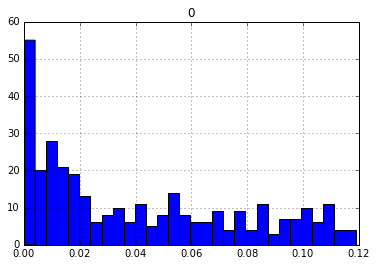

In [89]:
comp_0 = pd.DataFrame(pca.components_[0])
comp_0.abs().hist(bins=30)
comp_0_vars = comp_0[comp_0[0].abs()>.08].sort_values(by=0).index
X_std.columns[comp_0_vars]

In [90]:
comp_0_labelled = pd.DataFrame(index = X_std.columns[comp_0_vars].values, data= comp_0[comp_0[0].abs()>.08].sort_values(by=0)[0].values )
comp_0_labelled


,0
euLawsLevel,-0.111909
euUKRich,-0.110608
immigSelf,-0.110017
approveEUW9,-0.108700
immigCultural,-0.107836
immigSelfW9,-0.106853
immigEcon,-0.105770
echr,-0.104010
euCloser,-0.101206
euPreventWar,-0.100252


Index(['lr4', 'lr3', 'bestPM', 'lr2', 'lr1', 'efficacyPolCare', 'lr5',
       'efficacyPolCareW9', 'generalElectionVote', 'recallVote15',
       'generalElectionVoteW9', 'profile_past_vote_2015', 'partyId',
       'partyIdW9', 'changeCostLive', 'likeCorbyn', 'likeGove', 'conUnited',
       'achieveReduceImmigConW9', 'satDemEngW9', 'monarch', 'conUnitedW9',
       'satDemUKW9', 'changeNHS', 'satDemEng', 'changeEducation', 'trustMPsW9',
       'likeMayW9', 'satDemUK', 'changeEconomy', 'likeOsborneW9', 'lr_scale',
       'approveUKGovtW9', 'ptvConW9', 'likeOsborne', 'likeConW9',
       'likeCameronW9', 'likeCon', 'likeCameron'],
      dtype='object')

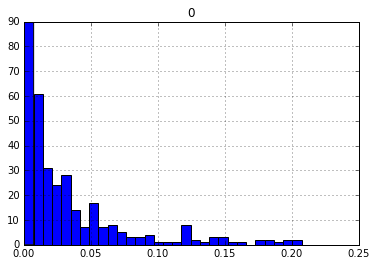

In [91]:
comp_1 = pd.DataFrame(pca.components_[1])
comp_1.abs().hist(bins=30)
comp_1_vars = comp_1[comp_1[0].abs()>.08].sort_values(by=0).index
X_std.columns[comp_1_vars]

In [92]:
comp_1_labelled = pd.DataFrame(index = X_std.columns[comp_1_vars].values, data= comp_1[comp_1[0].abs()>.08].sort_values(by=0)[0].values )
comp_1_labelled

,0
lr4,-0.162120
lr3,-0.150060
bestPM,-0.147846
lr2,-0.139383
lr1,-0.132575
efficacyPolCare,-0.127751
lr5,-0.121881
efficacyPolCareW9,-0.121104
generalElectionVote,-0.119919
recallVote15,-0.119634


Index(['polAttention', 'efficacyUnderstand', 'efficacyEU',
       'efficacyUnderstandW9', 'euRefInterest', 'certaintyEULD',
       'discussPolDays', 'immigGreen', 'immigGreenW9', 'certaintyEUGreen',
       'certaintyEUUKIP', 'immigLD', 'infoSourcePaper', 'immigLDW9',
       'euSources_2', 'certaintyEULab', 'immigLab', 'euSources_5',
       'euSources_4', 'infoSourceTV', 'infoSourceInternet', 'immigLabW9',
       'euKnow6', 'edlevel', 'certaintyUKRemain', 'education', 'euSources_3',
       'partyMember', 'negotiationSpecifics_99W9', 'euKnow2', 'certaintyEUCon',
       'efficacyNoMatterW9', 'betterDealEU', 'euSources_111', 'al4',
       'conUnited', 'al_scale', 'efficacyTooMuchEffortW9', 'gender',
       'tuSupport', 'EUIntegrationLD', 'labSupport', 'EUIntegrationGreen',
       'ldSupport', 'efficacyNotUnderstandW9'],
      dtype='object')

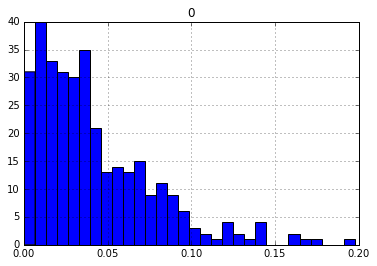

In [93]:
comp_2 = pd.DataFrame(pca.components_[2])
comp_2.abs().hist(bins=30)
comp_2_vars = comp_2[comp_2[0].abs()>.08].sort_values(by=0).index
X_std.columns[comp_2_vars]

In [94]:
comp_2_labelled = pd.DataFrame(index = X_std.columns[comp_2_vars].values, data= comp_2[comp_2[0].abs()>.08].sort_values(by=0)[0].values )
comp_2_labelled

,0
polAttention,-0.197530
efficacyUnderstand,-0.175492
efficacyEU,-0.166194
efficacyUnderstandW9,-0.158039
euRefInterest,-0.142504
certaintyEULD,-0.142491
discussPolDays,-0.142169
immigGreen,-0.138608
immigGreenW9,-0.130962
certaintyEUGreen,-0.125454


In [98]:
comp = pd.DataFrame(lda.coef_[0])
comp.abs().hist(bins=100)
comp_vars = comp[comp[0].abs()>.5].sort_values(by=0).index
X.columns[comp_vars]



array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [101]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)
lda.coef_

C:\ANACON~1\envs\BES_analysis\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

In [104]:
lda.get_params()

{'n_components': 2,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

In [68]:
X_std["personality_agreeableness"]

9.1613930922448836e-17

In [66]:
X = pd.read_hdf("../BES_analysis_data/clean_feature_set_reduced.hdf")

In [67]:
X["personality_agreeableness"].value_counts().sort_values()

0.0       52
1.0      155
2.0      483
4.0      811
9.0      897
10.0    1141
3.0     1541
8.0     3505
7.0     4993
6.0     5726
5.0     7539
Name: personality_agreeableness, dtype: int64

In [69]:
X["personality_agreeableness"].count()

26843

In [70]:
X["personality_agreeableness"].shape

(29065,)

In [172]:
X = X_std
y = X["euRefVote"]==1
X_drop = X.drop("euRefVote",axis=1)
lda = LinearDiscriminantAnalysis(solver='eigen',n_components=2)
X_r2 = lda.fit(X_drop, y).transform(X_drop)
print( (X_r.shape, X_r2.shape ) )


((29065, 10), (29065, 2))


In [196]:
abs_lda_coefs = abs(lda.coef_[0])
abs_lda_coefs_std = abs_lda_coefs.std()
outliers = abs_lda_coefs > abs_lda_coefs_std*2
#sum(outliers)
pd.DataFrame( lda.coef_[0][outliers] ).set_index( X_std.columns[outliers] ).sort_values(by=0)

C:\ANACON~1\envs\BES_analysis\lib\site-packages\pandas\indexes\base.py:1275: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 333 but corresponding boolean dimension is 332
  result = getitem(key)


,0
Age,-3.879170e-14
age,-3.597065e-14
gender,-2.932429e-14
profile_gross_personal,-2.367558e-14
euRedTape,-1.457508e-14
languageSkills,-1.337304e-14
privatePrimarySchool,-1.314744e-14
bestOnMIIW9,-1.303661e-14
neverPrivateSchool,-1.268194e-14
passports_4W9,-1.122378e-14
